# Evaluating feature differences using F-tests
## Setup

In [7]:
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
from src import data

In [8]:
pop_songs, non_pop_songs = data.get_split_dfs(drop_columns=['id','name','popularity','key'])
 
non_pop_songs["danceability"].var() / pop_songs["danceability"].var()

2.5071028985217345

In [9]:
f_tests = non_pop_songs.var() / pop_songs.var()

In [10]:
f_crit05 = scipy.stats.f.ppf(q=(1-0.05/9), dfn=(len(non_pop_songs)-1), dfd=(len(pop_songs))-1)
print(f_crit05)
f_crit01 = scipy.stats.f.ppf(q=(1-0.001/9), dfn=(len(non_pop_songs)-1), dfd=(len(pop_songs))-1)
print(f_crit01)

1.6126878823408348
2.0447177035769277


In [11]:
f_tests

danceability          2.507103
energy                2.263637
liveness              1.232870
loudness              9.271733
speechiness           3.578650
acousticness          1.807221
instrumentalness    642.007320
tempo                 0.833457
valence               1.217148
dtype: float64

In [12]:
f_test2 = pop_songs.var() / non_pop_songs.var()
f_test2

danceability        0.398867
energy              0.441767
liveness            0.811116
loudness            0.107855
speechiness         0.279435
acousticness        0.553336
instrumentalness    0.001558
tempo               1.199821
valence             0.821593
dtype: float64

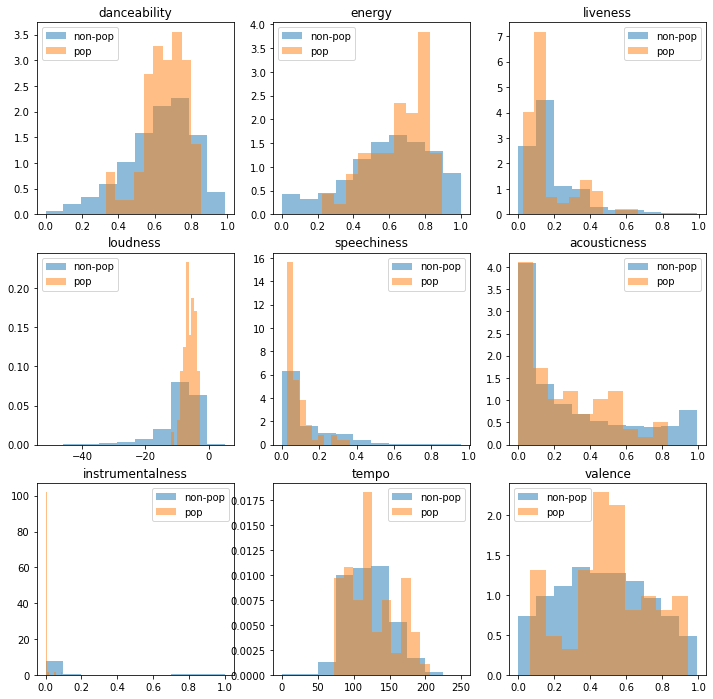

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(12,12))

for (i, ax) in enumerate(axes.ravel()):
    col = pop_songs.columns[i]
    ax.hist(non_pop_songs[col], bins=10, alpha=0.5, label="non-pop", density=True)
    ax.hist(pop_songs[col], bins=10, alpha=0.5, label="pop",density=True)
    ax.legend()
    ax.set_title(col)
plt.savefig("../fig/002_variances.pdf")
plt.show()